<a href="https://colab.research.google.com/github/jaytrey777/Coding-Dojo-Food-Sales-Predictions/blob/main/Jason_Tracey_Project_1_Part_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tasks

1. Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)
2.   Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.
3. Perform a train test split
4. Make sure your imputation of missing values occurs after the train test split using SimpleImputer.
5. Create a preprocessing object to prepare the dataset for Machine Learning

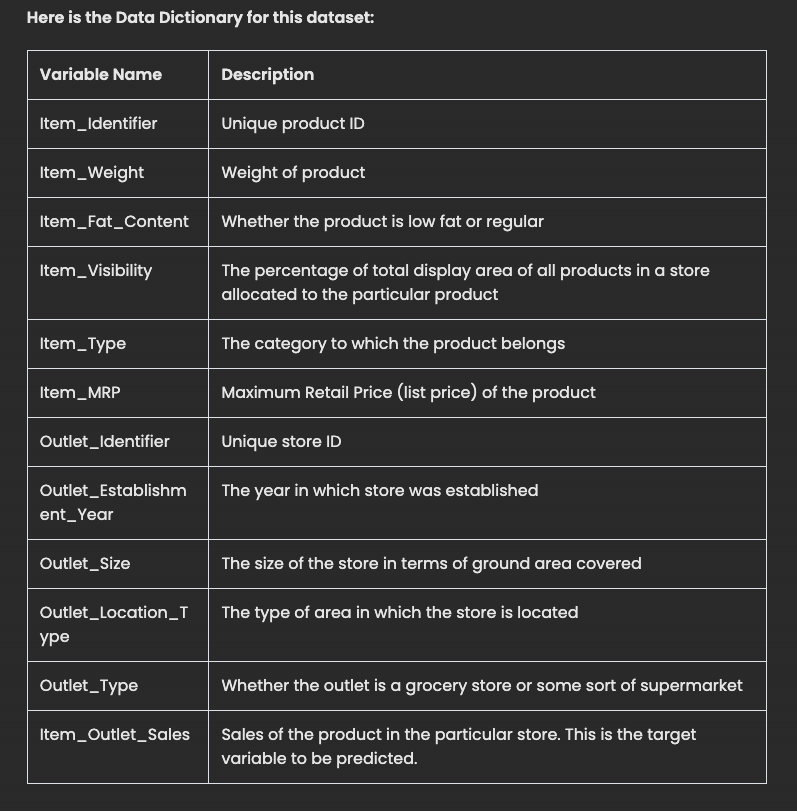

# Imports

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from sklearn import set_config
set_config(display = 'diagram')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Loading

In [5]:
filename = '/content/drive/MyDrive/Colab Notebooks/02. Weeks 5-8: Machine Learning/05 Week 5: Intro to Machine Learning/5. Core Assignments/sales_predictions.csv'
df = pd.read_csv(filename)

A quick verification to see if data was uploaded properly.

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Examine Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Task 1.

Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)

In [8]:
df.drop_duplicates(keep = 'first', inplace = True)

Since we had this data set before we know the `Item_Fat_Content` and `Outlet_Size` has `categories` that need to be addressed. I will view and  fix them.

In [9]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [10]:
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'}, inplace = True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [11]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
df['Outlet_Size'].replace({'High': 'Large'}, inplace = True)
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

# Splitting Data with Train/Test Split

##Task 2.

Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

In [13]:
target = 'Item_Outlet_Sales'
X = df.drop(columns = [target]).copy()
y = df[target].copy()

## Task 3.

Perform a train test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [15]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,NCG06,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,FDV57,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,FDM27,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,FDG24,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,FDD05,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [16]:
y_train.head()

4776     515.3292
7510    3056.0220
5828    1577.9460
5327    1331.6000
4810    1687.1372
Name: Item_Outlet_Sales, dtype: float64

#Preprocessing the Data

## Task 4.

Make sure your imputation of missing values occurs after the train test split using SimpleImputer.

Looking at our data set we have several different types of columns. We need to address missing values appropriately in order to train our model properly.

- Item_Identifier	(Nominal)
- Item_Weight	(Numerical)
- Item_Fat_Content (Nominal)	
- Item_Visibility	(Numerical)
- Item_Type	(Nominal)
- Item_MRP (Numerical)
- Outlet_Identifier	(Nominal)
- Outlet_Establishment_Year	(Nominal)
- Outlet_Size	(Ordinal)
- Outlet_Location_Type (Ordinal)
- Outlet_Type	(Ordinal)

Let's address how to fix any missing data.

### Numerical Columns

In [17]:
median_imputer = SimpleImputer(strategy = 'median')
scaler = StandardScaler()

numerical_pipeline = make_pipeline(median_imputer, scaler)

numerical_selector = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

numerical_tuple = (numerical_pipeline, numerical_selector)

### Nominal Columns

In [18]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
constant_imputer = SimpleImputer(strategy='constant', fill_value='missing')

nominal_pipeline = make_pipeline(constant_imputer, ohe)

nominal_selector = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year']

nominal_tuple = (nominal_pipeline, nominal_selector)

### Ordinal Columns

In [19]:
size_list = ['Small', 'Medium', 'Large']
location_type_list = ['Tier 1', 'Tier 2', 'Tier 3']
type_list = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']

odie = OrdinalEncoder(categories=[size_list, location_type_list, type_list])
frequent_imputer = SimpleImputer(strategy='most_frequent')
scaler2 = StandardScaler()

ordinal_pipeline = make_pipeline(frequent_imputer, odie, scaler2)

ordinal_selector = ['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

ordinal_tuple = (ordinal_pipeline, ordinal_selector)

##Task 5.

Create a preprocessing object to prepare the dataset for Machine Learning

In [20]:
preprocessor = make_column_transformer(ordinal_tuple, nominal_tuple, numerical_tuple, remainder='drop',)
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'Large'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3'],
                                                                             ['Grocery '
                                                                              'Store',
                                                                              'Supermarket '
                                                                              'Type1',
                                                                              'Supermarket '
                                                                              'Type2',
                                                                              'Supermarket '
                                                                              'Type3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['O...
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Item_Identifier', 'Item_Fat_Content',
                                  'Item_Type', 'Outlet_Identifier',
                                  'Outlet_Establishment_Year']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Weight', 'Item_Visibility',
                                  'Item_MRP'])])

In [23]:
X_train_processor = preprocessor.transform(X_train)
X_test_processor = preprocessor.transform(X_test)

In [24]:
X_train_processor

array([[ 0.28737371,  1.08494779,  0.98357205, ...,  0.82748547,
        -0.71277507,  1.82810922],
       [ 0.28737371,  1.08494779,  0.98357205, ...,  0.56664432,
        -1.29105225,  0.60336888],
       [ 0.28737371, -1.38477667, -0.26359965, ..., -0.12102782,
         1.81331864,  0.24454056],
       ...,
       [ 0.28737371, -0.14991444, -0.26359965, ...,  1.12389588,
        -0.92052713,  1.52302674],
       [ 0.28737371, -0.14991444, -0.26359965, ...,  1.77599877,
        -0.2277552 , -0.38377708],
       [-1.38404828, -1.38477667, -0.26359965, ...,  0.82748547,
        -0.95867683, -0.73836105]])

# Check the Result

In [26]:
columns = preprocessor.get_feature_names_out()

X_train_df = pd.DataFrame(X_train_processor, columns=columns)
X_train_df

,pipeline-1__Outlet_Size,pipeline-1__Outlet_Location_Type,pipeline-1__Outlet_Type,pipeline-2__Item_Identifier_DRA12,pipeline-2__Item_Identifier_DRA24,pipeline-2__Item_Identifier_DRA59,pipeline-2__Item_Identifier_DRB01,pipeline-2__Item_Identifier_DRB13,pipeline-2__Item_Identifier_DRB24,pipeline-2__Item_Identifier_DRB25,...,pipeline-2__Outlet_Establishment_Year_1997,pipeline-2__Outlet_Establishment_Year_1998,pipeline-2__Outlet_Establishment_Year_1999,pipeline-2__Outlet_Establishment_Year_2002,pipeline-2__Outlet_Establishment_Year_2004,pipeline-2__Outlet_Establishment_Year_2007,pipeline-2__Outlet_Establishment_Year_2009,pipeline-3__Item_Weight,pipeline-3__Item_Visibility,pipeline-3__Item_MRP
0,0.287374,1.084948,0.983572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.827485,-0.712775,1.828109
1,0.287374,1.084948,0.983572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.566644,-1.291052,0.603369
2,0.287374,-1.384777,-0.263600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.121028,1.813319,0.244541
3,-1.384048,-0.149914,-0.263600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.158464,-1.004931,-0.952591
4,0.287374,-0.149914,-0.263600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.538870,-0.965484,-0.336460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,0.287374,1.084948,-1.510771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.821742,4.309657,-0.044657
6388,0.287374,-0.149914,-0.263600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.649639,1.008625,-1.058907
6389,0.287374,-0.149914,-0.263600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.123896,-0.920527,1.523027
6390,0.287374,-0.149914,-0.263600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.775999,-0.227755,-0.383777


In [28]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Columns: 1593 entries, pipeline-1__Outlet_Size to pipeline-3__Item_MRP
dtypes: float64(1593)
memory usage: 77.7 MB
